In [12]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Four sampling assumptions

1. Observations are independent
2. Sample is collected randomly
3. The sample is approximately normally distributed
4. Appropriate Sample Size

## Law of Total Probability

Sometimes we want to calculate an **unconditional** probability by making use of some **conditional** probabilities. Enter the Law of Total Probability:

$$\large P(A)=\sum _{n}P(A\cap B_{n})$$

Which works out to: 

$$\large P(A)=\sum _{n}P(A\mid B_{n}) * P(B_{n})$$

Where $B_{n}$ captures all of the disjoint events that combine to define the sample space, so $\sum P(B_{n}) = 1$.

use normaltest()from scipy to check if the dataset is normally distributed.

The normal distribution empirical rule states that $68\%$ of the values of a normal distribution of data lie within 1 standard deviation ($\sigma$) of the mean, $95\%$ within $2\sigma$, and $99.7\%$ within $3\sigma$.  

In [27]:
print(2*stats.norm.cdf(1) - 1) 
print(2*stats.norm.cdf(2) - 1)
print(2*stats.norm.cdf(3) - 1)

# You double the CDF value at x to account for the symmetric area on both sides of the mean in the standard normal distribution.
# You subtract 1 to remove the area to the left of the mean, focusing only on the interval from −x to x.

0.6826894921370859
0.9544997361036416
0.9973002039367398


In [30]:
print(stats.norm.ppf(0.84))  # 68%: 0.5 (for 50% below the mean) + 0.34

0.9944578832097531

$\Large z = \dfrac{{\bar{x}} - \mu_{0}}{\dfrac{\sigma}{\sqrt{n}}}$

The denominator $\frac{\sigma}{\sqrt{n}}$, is the standard error. Standard error is the standard deviation of the sampling mean.)

In [13]:
# we can use stats to calculate the percentile
z = 1.65
print(stats.norm.cdf(z))

# We can also use the survival function to calculate the probability
# p value
print(stats.norm.sf(z))

# 95% chance your sample comes from a different population (not a perfectly precise explanation)
# 5% chance the sample is from the population (not a perfectly precise explanation)

0.9505285319663519
0.04947146803364811


**False positives** are **type 1 errors** and occur when we _reject the null hypothesis_ (favoring the alternative hypothesis) but the "truth" is that we should have _failed to reject_ (favoring the null hypothesis).

**False negatives** are **type 2 errors** and occur when we _fail to reject the null hypothesis_ (favoring the null hypothesis) but the "truth" is that we should have _rejected the hypothesis_ (favoring the alternative hypothesis).

This error can be denoted with $\beta$ but typically it's talked about in terms of **statistical power** ($1-\beta$) which we'll see later. Note that we want $\beta$ to be small, but statistical power to be high (they're complements of another)

Generally, we want our false negative rate $\beta$ to be about $20\%$ but again it depends on the application.

<img src="images/z_or_t_test.png" width="900">

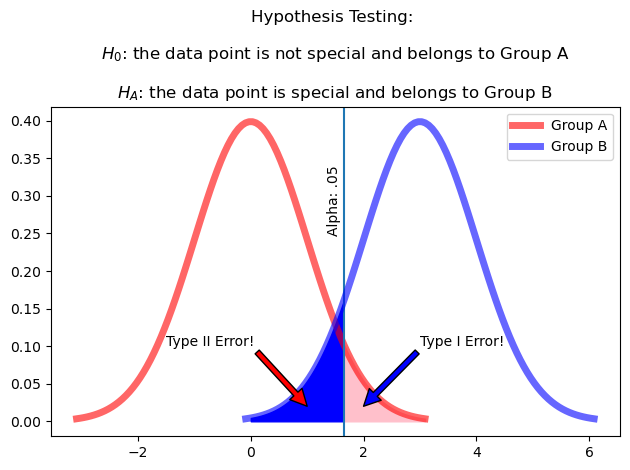

In [14]:
# Visulization of two samples being compared with one another
fig, ax = plt.subplots()

y = np.linspace(stats.norm(0, 1).ppf(0.001),
             stats.norm(0, 1).ppf(0.999), 100)

alpha = stats.norm(0, 1).ppf(0.95)


ax.plot(y, stats.norm(0, 1).pdf(y), 'r-', lw=5, alpha=0.6, label='Group A')
ax.axvline(alpha)

px = np.arange(stats.norm(0, 1).ppf(0.95), stats.norm(0, 1).ppf(0.999), 0.001)
ax.fill_between(px, stats.norm(0, 1).pdf(px), color = 'pink')



x = np.linspace(stats.norm(3, 1).ppf(0.001),
             stats.norm(3, 1).ppf(0.999), 100)

ax.plot(x, stats.norm(3, 1).pdf(x), 'b-', lw=5, alpha=0.6, label='Group B')


px = np.arange(stats.norm(0, 1).ppf(0.5),stats.norm(0, 1).ppf(0.95), 0.001)
ax.fill_between(px, stats.norm(3, 1).pdf(px), color='blue')
ax.legend(loc='upper right')

ax.set_title("""Hypothesis Testing: \n
$H_0$: the data point is not special and belongs to Group A \n
$H_A$: the data point is special and belongs to Group B """)
ax.text(1.35, 0.25, 'Alpha: .05', rotation=90)

ax.annotate('Type I Error!', xy=(2, 0.02),
            xytext=(3, 0.1), arrowprops={'facecolor': 'blue'})
ax.annotate('Type II Error!', xy=(1, 0.02),
            xytext=(-1.5, 0.1), arrowprops={'facecolor': 'red'})


plt.tight_layout()

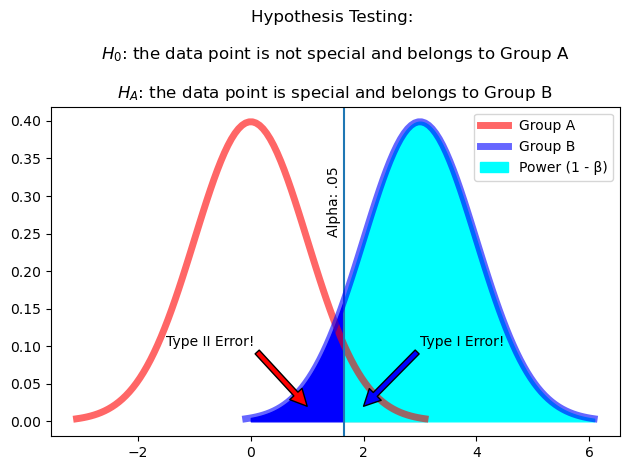

In [15]:
# Visulization of two samples being compared with one another
fig, ax = plt.subplots()

y = np.linspace(stats.norm(0, 1).ppf(0.001),
             stats.norm(0, 1).ppf(0.999), 100)

alpha = stats.norm(0, 1).ppf(0.95)


ax.plot(y, stats.norm(0, 1).pdf(y), 'r-', lw=5, alpha=0.6, label='Group A')
ax.axvline(alpha)

px = np.arange(stats.norm(0, 1).ppf(0.95), stats.norm(0, 1).ppf(0.999), 0.001)
ax.fill_between(px, stats.norm(0, 1).pdf(px), color = 'pink')



x = np.linspace(stats.norm(3, 1).ppf(0.001),
             stats.norm(3, 1).ppf(0.999), 100)

ax.plot(x, stats.norm(3, 1).pdf(x), 'b-', lw=5, alpha=0.6, label='Group B')


px = np.arange(stats.norm(0, 1).ppf(0.5),stats.norm(0, 1).ppf(0.95), 0.001)
ax.fill_between(px, stats.norm(3, 1).pdf(px), color='blue')
ax.legend(loc='upper right')

# Shading for Power: Area under Group B curve to the right of alpha threshold
px_power = np.arange(stats.norm(0, 1).ppf(0.95), stats.norm(3, 1).ppf(0.999), 0.001)
ax.fill_between(px_power, stats.norm(3, 1).pdf(px_power), color='cyan', label='Power (1 - β)')

ax.set_title("""Hypothesis Testing: \n
$H_0$: the data point is not special and belongs to Group A \n
$H_A$: the data point is special and belongs to Group B """)
ax.text(1.35, 0.25, 'Alpha: .05', rotation=90)

ax.annotate('Type I Error!', xy=(2, 0.02),
            xytext=(3, 0.1), arrowprops={'facecolor': 'blue'})
ax.annotate('Type II Error!', xy=(1, 0.02),
            xytext=(-1.5, 0.1), arrowprops={'facecolor': 'red'})

ax.legend(loc='upper right')

plt.tight_layout()

## One sample t-test example

In [17]:
# Using Python to perform a one-sample t-test

gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601, 
        8559, 8228, 8474, 8708, 8128
])

print(f'Sample mean: {np.mean(gab):.1f}')
print(f'Sample std: {np.std(gab, ddof =1):.1f}')
result = stats.ttest_1samp(gab, 9000)
t_stat, p_value = result
result

Sample mean: 8562.0
Sample std: 296.2


TtestResult(statistic=-6.614120615780001, pvalue=2.498214901380142e-06, df=19)

## Two sample t-test example: when we don't have all the raw data

You measure the delivery times of ten different restaurants in two different neighborhoods. You want to know if restaurants in the different neighborhoods have the same delivery times. Set your significance threshold to 0.05. 

We measured this for neighborhood A: 

``` python
delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
```

For neighborhood B, someone already reported the values as a mean time of 26.8 minutes and a standard deviation of 2.6 minutes.

In [18]:
delivery_times_A = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]
mean_A = np.mean(delivery_times_A)
std_A = np.std(delivery_times_A)
nobs_A = len(delivery_times_A)
mean_B = 26.8
std_B = 2.6
nobs_B = 10

In [19]:
stats.ttest_ind_from_stats(mean1=mean_A, std1=std_A, nobs1=nobs_A,
                          mean2=mean_B, std2=std_B, nobs2=nobs_B,
                          equal_var=False)

Ttest_indResult(statistic=1.8206924435070326, pvalue=0.08535597189429299)

## Two sample t-test example: when we have all the raw data

In [21]:
# Twelve rats were fed on a high-protein diet and seven rats were fed on a low-protein diet. 
# Is there any difference in the weight gain of rats fed on high protein diet vs low protein diet? 
# It's OK to assume equal sample variances.

high_protein = [134, 146, 104, 119, 124, 161, 107, 83, 113, 129, 97, 123]
low_protein = [70, 118, 101, 85, 107, 132, 94]

# easier method
print(np.var(high_protein, ddof = 1) == np.var(low_protein, ddof = 1))
stats.ttest_ind(high_protein , low_protein , equal_var=False, alternative ='two-sided')

False


TtestResult(statistic=1.9107001042454415, pvalue=0.07820704092145599, df=13.081702113268564)

## Calculate confidence interval

In [35]:
# Manual method
n = 30
sample_data = np.random.randn(n) * 15 + 100  
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

# Use 0.975 to find the t-value for a 95% confidence interval with 29 degrees of freedom (n-1).
# critical value = .05/2 = .025
# 1 - .025 = 0.975
t_value = stats.t.ppf(0.975, n-1)

samp_standard_error = sample_std / np.sqrt(n)

margin_error = t_value * samp_standard_error

interval_min = sample_mean - margin_error

interval_max = sample_mean + margin_error

print(f"95% confidence interval: {interval_min:.3f} to {interval_max:.3f}")

95% confidence interval: 93.753 to 105.176


In [38]:
# Using scipy
stats.t.interval(confidence=0.95,
                 loc = np.mean(sample_data),
                 scale = stats.sem(sample_data),
                 df=n-1)

(93.75300878553583, 105.17634393447253)

In [40]:
stats.norm.interval(confidence=0.95,
                 loc = np.mean(sample_data),
                 scale = stats.sem(sample_data))

(93.99112830114181, 104.93822441886654)